# Flight Results Comparison

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\guiga\Documents\GitHub\RocketPy\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install SciencePlots


Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\guiga\Documents\GitHub\RocketPy\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [87]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex', 'grid'])
#print(plt.style.available)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter
%matplotlib inline

In [3]:
# from google.colab import drive
# drive.mount('/gdrive')

# import os
# os.chdir("/gdrive/Shared drives/RocketPy Paper/Conteudo/flightData")   
import os
os.chdir('../science_plots')

In [4]:
os.listdir()

['.vscode',
 'Graficos finais',
 'Graficos finais v2',
 'rocketpaper.ipynb',
 'Valetudo_cambridge',
 'Valetudo_cambridge.zip',
 'Valetudo_cambridgeNEW',
 'Valetudo_cambridgeNEW.zip',
 'Valetudo_openrocket',
 'Valetudo_openrocket-20201004T052750Z-001.zip',
 'Valetudo_rocketpy_CFD',
 'Valetudo_rocketpy_CFD-20201004T052724Z-001.zip',
 'Valetudo_RRC3']

## OpenRocket

In [22]:
#df_or = pd.read_csv('C:\\Users\\rod-n\\OneDrive\\Documentos\\Education\\Research\\RocketPaper\\valetudo_openrocket_atualizado.csv', delimiter=';')

#df_or = pd.read_csv('Valetudo_openrocket/Valetudo_OpenRocket_27set.csv', delimiter=';')
df_or = pd.read_csv('Valetudo_openrocket/Valetudo_openrocket/Valetudo_OpenRocket_27outt.csv', delimiter=';')

In [6]:
df_or.head()

# Time (s)  Altitude (m)  \
0    # Event LAUNCH occurred at t=0 seconds           NaN   
1  # Event IGNITION occurred at t=0 seconds           NaN   
2                                         0           0.0   
3                                      2e-3           0.0   
4                                      4e-3           0.0   

   Vertical velocity (m/s)  Vertical acceleration (m/s)  Total velocity (m/s)  \
0                      NaN                          NaN                   NaN   
1                      NaN                          NaN                   NaN   
2                      0.0                      -9.3012                   0.0   
3                      0.0                      -9.3053                   0.0   
4                      0.0                      -9.3012                   0.0   

   Total acceleration (m/s)  Position East of launch (m)  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                    9.3411                          0.0   
3                    9.3452                          0.0   
4                    9.3411                          0.0   

   Position North of launch (m)  Lateral distance (m)  Lateral direction ()  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                           0.0                   0.0                   0.0   
3                           0.0                   0.0                   0.0   
4                           0.0                   0.0                   0.0   

   ...  Reference length (mm)  Reference area (m)  \
0  ...                    NaN                 NaN   
1  ...                    NaN                 NaN   
2  ...                   80.9             0.00514   
3  ...                   80.9             0.00514   
4  ...                   80.9             0.00514   

   Vertical orientation (zenith) ()  Lateral orientation (azimuth) ()  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                              84.7                              37.0   
3                              84.7                              37.0   
4                              84.7                              37.0   

   Wind velocity (m/s)  Air temperature (C)  Air pressure (Pa)  \
0                  NaN                  NaN                NaN   
1                  NaN                  NaN                NaN   
2                  NaN               26.702            93133.0   
3                  NaN               26.702            93133.0   
4                  NaN               26.702            93133.0   

   Speed of sound (m/s)  Simulation time step (s)  Computation time (s)  
0                   NaN                       NaN                   NaN  
1                   NaN                       NaN                   NaN  
2                347.48                     0.002              0.009166  
3                347.48                     0.002              0.012929  
4                347.48                     0.002              0.016645  

[5 rows x 54 columns]

In [23]:
df_or[df_or['Altitude (m)'] > 0]

# Time (s)  Altitude (m)  Vertical velocity (m/s)  \
250       0.496  2.990900e-07                 0.000299   
251       0.498  1.778900e-06                 0.001181   
252         0.5  5.604500e-06                 0.002645   
253       0.502  1.294100e-05                 0.004691   
254       0.504  2.495300e-05                 0.007320   
...         ...           ...                      ...   
2206      61.53  4.095100e+01               -18.167000   
2207      62.03  3.186800e+01               -18.162000   
2208      62.53  2.278800e+01               -18.158000   
2209      63.03  1.371100e+01               -18.153000   
2210      63.53  4.635400e+00               -18.148000   

      Vertical acceleration (m/s)  Total velocity (m/s)  \
250                      0.440630              0.000300   
251                      0.731860              0.001186   
252                      1.023100              0.002656   
253                      1.314400              0.004712   
254                      1.605600              0.007352   
...                           ...                   ...   
2206                     0.009044             18.172000   
2207                     0.009382             18.168000   
2208                     0.009184             18.163000   
2209                     0.009363             18.158000   
2210                     0.009385             18.153000   

      Total acceleration (m/s)  Position East of launch (m)  \
250                   0.442520                 2.215900e-08   
251                   0.735000                 1.318000e-07   
252                   1.027500                 4.152200e-07   
253                   1.320000                 9.587400e-07   
254                   1.612500                 1.848700e-06   
...                        ...                          ...   
2206                  0.074294                 2.755900e+02   
2207                  0.088351                 2.770200e+02   
2208                  0.058964                 2.784300e+02   
2209                  0.071384                 2.798400e+02   
2210                  0.067551                 2.812500e+02   

      Position North of launch (m)  Lateral distance (m)  \
250                   1.669800e-08          2.774600e-08   
251                   9.931600e-08          1.650300e-07   
252                   3.128900e-07          5.199100e-07   
253                   7.224600e-07          1.200500e-06   
254                   1.393100e-06          2.314800e-06   
...                            ...                   ...   
2206                  7.067100e+01          2.845100e+02   
2207                  7.012300e+01          2.857500e+02   
2208                  6.958300e+01          2.869900e+02   
2209                  6.904100e+01          2.882300e+02   
2210                  6.849900e+01          2.894700e+02   

      Lateral direction ()  ...  Reference length (mm)  Reference area (m)  \
250                 37.000  ...                   80.9             0.00514   
251                 37.000  ...                   80.9             0.00514   
252                 37.000  ...                   80.9             0.00514   
253                 37.000  ...                   80.9             0.00514   
254                 37.000  ...                   80.9             0.00514   
...                    ...  ...                    ...                 ...   
2206                14.383  ...                    NaN                 NaN   
2207                14.205  ...                    NaN                 NaN   
2208                14.032  ...                    NaN                 NaN   
2209                13.859  ...                    NaN                 NaN   
2210                13.688  ...                    NaN                 NaN   

      Vertical orientation (zenith) ()  Lateral orientation (azimuth) ()  \
250                               84.7                              37.0   
251                             

In [10]:
df_or[df_or['# Time (s)'].str.contains("#")]

# Time (s)  Altitude (m)  \
0                # Event LAUNCH occurred at t=0 seconds           NaN   
1              # Event IGNITION occurred at t=0 seconds           NaN   
301         # Event LIFTOFF occurred at t=0.598 seconds           NaN   
571       # Event LAUNCHROD occurred at t=1.136 seconds           NaN   
988        # Event BURNOUT occurred at t=5.2802 seconds           NaN   
989   # Event EJECTION_CHARGE occurred at t=5.2802 s...           NaN   
1935         # Event APOGEE occurred at t=14.73 seconds           NaN   
2109  # Event RECOVERY_DEVICE_DEPLOYMENT occurred at...           NaN   
2211     # Event GROUND_HIT occurred at t=64.03 seconds           NaN   
2212  # Event SIMULATION_END occurred at t=64.03 sec...           NaN   

      Vertical velocity (m/s)  Vertical acceleration (m/s)  \
0                         NaN                          NaN   
1                         NaN                          NaN   
301                       NaN                          NaN   
571                       NaN                          NaN   
988                       NaN                          NaN   
989                       NaN                          NaN   
1935                      NaN                          NaN   
2109                      NaN                          NaN   
2211                      NaN                          NaN   
2212                      NaN                          NaN   

      Total velocity (m/s)  Total acceleration (m/s)  \
0                      NaN                       NaN   
1                      NaN                       NaN   
301                    NaN                       NaN   
571                    NaN                       NaN   
988                    NaN                       NaN   
989                    NaN                       NaN   
1935                   NaN                       NaN   
2109                   NaN                       NaN   
2211                   NaN                       NaN   
2212                   NaN                       NaN   

      Position East of launch (m)  Position North of launch (m)  \
0                             NaN                           NaN   
1                             NaN                           NaN   
301                           NaN                           NaN   
571                           NaN                           NaN   
988                           NaN                           NaN   
989                           NaN                           NaN   
1935                          NaN                           NaN   
2109                          NaN                           NaN   
2211                          NaN                           NaN   
2212                          NaN                           NaN   

      Lateral distance (m)  Lateral direction ()  ...  Reference length (mm)  \
0                      NaN                   NaN  ...                    NaN   
1                      NaN                   NaN  ...                    NaN   
301                    NaN                   NaN  ...                    NaN   
571                    NaN                   NaN  ...                    NaN   
988                    NaN                   NaN  ...                    NaN   
989                    NaN                   NaN  ...                    NaN   
1935                   NaN                   NaN  ...                    NaN   
2109                   NaN                   NaN  ...                    NaN   
2211                   NaN                   NaN  ...                    NaN   
2212                   NaN                   NaN  ...                    NaN   

      Reference area (m)  Vertical orientation (zenith) ()  \
0                    NaN                               NaN   
1                    NaN                               NaN   
301                  NaN                               NaN   
571                  NaN                               NaN   
988         

In [24]:
df_or = df_or[~df_or['# Time (s)'].str.contains("#")]

In [25]:
df_or.columns

Index(['# Time (s)', 'Altitude (m)', 'Vertical velocity (m/s)',
       'Vertical acceleration (m/s)', 'Total velocity (m/s)',
       'Total acceleration (m/s)', 'Position East of launch (m)',
       'Position North of launch (m)', 'Lateral distance (m)',
       'Lateral direction ()', 'Lateral velocity (m/s)',
       'Lateral acceleration (m/s)', 'Latitude ()', 'Longitude ()',
       'Gravitational acceleration (m/s)', 'Angle of attack ()',
       'Roll rate (/s)', 'Pitch rate (/s)', 'Yaw rate (/s)', 'Mass (g)',
       'Propellant mass (g)', 'Longitudinal moment of inertia (kgm)',
       'Rotational moment of inertia (kgm)', 'CP location (mm)',
       'CG location (mm)', 'Stability margin calibers (?)', 'Mach number (?)',
       'Reynolds number (?)', 'Thrust (N)', 'Drag force (N)',
       'Drag coefficient (?)', 'Axial drag coefficient (?)',
       'Friction drag coefficient (?)', 'Pressure drag coefficient (?)',
       'Base drag coefficient (?)', 'Normal force coefficient (?)',
    

In [26]:
#time_or = df_or['Time (s)'].iloc[247:].iloc[::50]
#altitude_or = df_or['Altitude (m)'].iloc[247:].iloc[::50]
#velocity_or = df_or['Vertical velocity (m/s)'].iloc[247:].iloc[::50]
#total_velocity_or = df_or['Total velocity (m/s)'].iloc[247:].iloc[::50]
#acceleration_or = df_or['Vertical acceleration (m/s²)'].iloc[247:].iloc[::50]
#roll_rate_or = df_or['Roll rate (°/s)'].iloc[247:].iloc[::50]
#yaw_rate_or = df_or['Yaw rate (°/s)'].iloc[247:].iloc[::50]
#pitch_rate_or = df_or['Pitch rate (°/s)'].iloc[247:].iloc[::50]
#wind_velocity_or = df_or['Wind velocity (m/s)'].iloc[247:].iloc[::50]
#angle_attack_or = df_or['Angle of attack (°)'].iloc[247:].iloc[::50]
#easting_or = df_or['Position East of launch (m)'].iloc[247:].iloc[::50]
#northing_or = df_or['Position North of launch (m)'].iloc[247:].iloc[::50]

In [26]:
time_or = df_or['# Time (s)'].iloc[248:]
altitude_or = df_or['Altitude (m)'].iloc[248:]
velocity_or = df_or['Vertical velocity (m/s)'].iloc[248:]
total_velocity_or = df_or['Total velocity (m/s)'].iloc[248:]
acceleration_or = df_or['Vertical acceleration (m/s)'].iloc[248:]
# roll_rate_or = df_or['Roll rate (°/s)'].iloc[248:]
# yaw_rate_or = df_or['Yaw rate (°/s)'].iloc[248:]
# pitch_rate_or = df_or['Pitch rate (°/s)'].iloc[248:]
# wind_velocity_or = df_or['Wind velocity (m/s)'].iloc[248:]
angle_attack_or = df_or['Angle of attack ()'].iloc[248:]
easting_or = df_or['Position East of launch (m)'].iloc[248:]
northing_or = df_or['Position North of launch (m)'].iloc[248:]

In [28]:
L = []
for i in time_or:
  L.append(float(i)) #- 0.494
time_or = L

L = []
for i in altitude_or:
  L.append(float(i))
altitude_or = L

L = []
for i in velocity_or:
  L.append(float(i))
velocity_or = L

L = []
for i in total_velocity_or:
  L.append(float(i))
total_velocity_or = L

L = []
for i in acceleration_or:
  L.append(float(i))
acceleration_or = L

L = []
for i in angle_attack_or:
  L.append(float(i))
angle_attack_or = L

L = []
for i in easting_or:
  L.append(float(i))
easting_or = L


L = []
for i in northing_or:
  L.append(float(i))
northing_or = L

In [188]:
max(acceleration_or)

107.98

In [190]:
velocity_or[-1]

-18.144000000000002

## Cambridge

In [72]:
df_cb = pd.read_csv('Valetudo_cambridgeNEW/Valetudo_cambridge/valetudo_3000simulations.csv', delimiter=',')

In [73]:
df_cb.head()

INDEX  ID_STR ID_STAGE_STR  TIME_SECONDS_DOUBLE  EASTINGS_METERS_DOUBLE  \
0      0       0  SingleStage                 0.01                     0.0   
1      1       0  SingleStage                 0.06                     0.0   
2      2       0  SingleStage                 0.31                     0.0   
3      3       0  SingleStage                 0.35                     0.0   
4      4       0  SingleStage                 0.39                     0.0   

   NORTHINGS_METERS_DOUBLE  ALTITUDE_METERS_DOUBLE  DISTANCE_METERS_DOUBLE  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

   EVENT_INT  
0          0  
1          0  
2          0  
3          0  
4          0

In [74]:
time_cb = df_cb['TIME_SECONDS_DOUBLE'].iloc[:207]
altitude_cb = df_cb['ALTITUDE_METERS_DOUBLE'].iloc[:207]
easting_cb = df_cb['EASTINGS_METERS_DOUBLE'].iloc[:207]
northing_cb = df_cb['NORTHINGS_METERS_DOUBLE'].iloc[:207]

In [75]:
max(altitude_cb)

1067.82

In [ ]:
for i in time_cb:
    np.where(i= )

In [76]:
df_cb.columns

Index(['INDEX', 'ID_STR', 'ID_STAGE_STR', 'TIME_SECONDS_DOUBLE',
       'EASTINGS_METERS_DOUBLE', 'NORTHINGS_METERS_DOUBLE',
       'ALTITUDE_METERS_DOUBLE', 'DISTANCE_METERS_DOUBLE', 'EVENT_INT'],
      dtype='object')

In [77]:
velocity_cb = [0]
for i in range(1, len(time_cb)-1):
    velocity_cb.append((altitude_cb[i+1] - altitude_cb[i-1])/(time_cb[i+1] - time_cb[i-1]))
velocity_cb.append(velocity_cb[-1])


In [198]:
max(velocity_cb)

135.263488080301

In [36]:
# xVelocity_cb = [0]
# for i in range(1, len(time_cb)-1):
#     xVelocity_cb.append((easting_cb[i+1] - easting_cb[i-1])/(time_cb[i+1] - time_cb[i-1]))
# xVelocity_cb.append(xVelocity_cb[-1])

# yVelocity_cb = [0]
# for i in range(1, len(time_cb)-1):
#     yVelocity_cb.append((northing_cb[i+1] - northing_cb[i-1])/(time_cb[i+1] - time_cb[i-1]))
# yVelocity_cb.append(yVelocity_cb[-1])

# totalVelocity_cb = []
# for i in range(len(velocity_cb)):
#     totalVelocity_cb.append( (velocity_cb[i]**2 + xVelocity_cb[i]**2 + yVelocity_cb[i]**2)**0.5 )

## RocketPy

In [37]:
#df_rp = pd.read_csv('C:\\Users\\rod-n\\OneDrive\\Documentos\\Education\\Research\\RocketPaper\\valetudo_rocketpy.csv')

df_rp = pd.read_csv('Valetudo_rocketpy_CFD/Valetudo_rocketpy_CFD/valetudo_ROCKETPY_CFD.csv', delimiter=',')

In [38]:
df_rp.head()

t(s)          x(m)          y(m)  z(m)       vx(m/s)       vy(m/s)  \
0  0.000  0.000000e+00  0.000000e+00   0.0  0.000000e+00  0.000000e+00   
1  0.002 -7.284496e-16 -5.489261e-16   0.0 -8.221970e-13 -6.195699e-13   
2  0.004 -1.265819e-15 -9.538628e-16   0.0 -1.428723e-12 -1.076620e-12   
3  0.006 -1.421027e-15 -1.070821e-15   0.0 -1.603905e-12 -1.208629e-12   
4  0.008 -1.002994e-15 -7.558100e-16   0.0 -1.132074e-12 -8.530786e-13   

        vz(m/s)  ax(m/s²)  ay(m/s²)  az(m/s²)     w1(rad/s)     w2(rad/s)  \
0  0.000000e+00       0.0       0.0       0.0  0.000000e+00  0.000000e+00   
1 -1.109770e-11       0.0       0.0       0.0  3.059215e-42 -2.153039e-41   
2 -1.928434e-11       0.0       0.0       0.0  5.315964e-42 -3.741312e-41   
3 -2.164889e-11       0.0       0.0       0.0  5.967780e-42 -4.200053e-41   
4 -1.528029e-11       0.0       0.0       0.0  4.212198e-42 -2.964495e-41   

   w3(rad/s)  Angle_of_Attack(degrees)  Pressure(Pa)  \
0        0.0                  90.75728  94310.960595   
1        0.0                  90.75728  94310.960595   
2        0.0                  90.75728  94310.960595   
3        0.0                  90.75728  94310.960595   
4        0.0                  90.75728  94310.960595   

                          Temperature(K)  Drag(N)  
0  300.76073790450270.022989320125084197      NaN  
1  300.76073790450270.022989320125086306      NaN  
2   300.76073790450270.02298932012508786      NaN  
3  300.76073790450270.022989320125088312      NaN  
4    300.76073790450270.0229893201250871      NaN

In [39]:
df_rp['t(s)']

0         0.000
1         0.002
2         0.004
3         0.006
4         0.008
          ...  
32603    65.206
32604    65.208
32605    65.210
32606    65.212
32607    65.214
Name: t(s), Length: 32608, dtype: float64

In [40]:
#df_rp = df_rp.apply(pd.to_numeric)

In [41]:
time_rp = df_rp['t(s)']
altitude_rp = df_rp['z(m)']
velocity_rp = df_rp['vz(m/s)']
total_velocity_rp = np.sqrt((df_rp['vx(m/s)']**2) + (df_rp['vy(m/s)']**2) + (df_rp['vz(m/s)']**2))
angle_attack_rp = df_rp['Angle_of_Attack(degrees)']
acceleration_rp = df_rp['az(m/s²)']
easting_rp = df_rp['x(m)']
northing_rp = df_rp['y(m)']

In [42]:
df_rp.columns

Index(['t(s)', 'x(m)', 'y(m)', 'z(m)', 'vx(m/s)', 'vy(m/s)', 'vz(m/s)',
       'ax(m/s²)', 'ay(m/s²)', 'az(m/s²)', 'w1(rad/s)', 'w2(rad/s)',
       'w3(rad/s)', 'Angle_of_Attack(degrees)', 'Pressure(Pa)',
       'Temperature(K)', 'Drag(N)'],
      dtype='object')

In [207]:
max(acceleration_rp)

107.87106327192524

## RRC3 (Real data)

In [43]:
flight_data = np.loadtxt("Valetudo_RRC3/Valetudo_RRC3/Results Filtering/RRC3_valetudo_remov - RRC3.csv", skiprows=1, delimiter=',', usecols=(0, 2, 4))

In [44]:
time_RRC3 = flight_data[:, 0]
altitude_RRC3 = flight_data[:, 1]
altitude_hat_RRC3 = savgol_filter(altitude_RRC3, 51, 3)
velocity_RRC3 = flight_data[:, 2]

vertical_speed = [0]
for i in range(1, len(time)-1):
    vertical_speed.append((altitude_hat_RRC3[i+1] - altitude_hat_RRC3[i-1])/(time[i+1] - time[i-1]))
vertical_speed += [0]

vertical_speed = savgol_filter(vertical_speed, 51, 3)

velocity_RRC3 = savgol_filter(velocity_RRC3, 51, 3)

NameError: name 'time' is not defined

In [181]:
max(velocity_RRC3)

266.8168683820647

In [141]:
len(time_RRC3)

3250

In [142]:
len(altitude_hat_RRC3)

3250

In [182]:
for i in range(3250-1, 1000, -1):
    time = np.arange(0, time_RRC3[i], (time_RRC3[i])/3250)
    if len(time) == 3250:
        vertical_speed = [0]
        for j in range(1, len(time)-1):
            vertical_speed.append((altitude_hat_RRC3[j+1] - altitude_hat_RRC3[j-1])/(time[j+1] - time[j-1]))
        vertical_speed += [0]

        vertical_speed = savgol_filter(vertical_speed, 51, 3)

        #terminal = (vertical_speed[2800] + vertical_speed[2900] + vertical_speed[2700] + vertical_speed[2600] + vertical_speed[2500] + vertical_speed[2750])/(6)
        #print(terminal)
        if max(vertical_speed) >= 266.8168683820647 -1 and max(vertical_speed) <= 266.8168683820647 + 1:
        #if terminal<=-18.5 and terminal>=-19:
            final_time = time
            print(final_time[-1])
            break

print(time[-1])

50.13456923076923
50.13456923076923


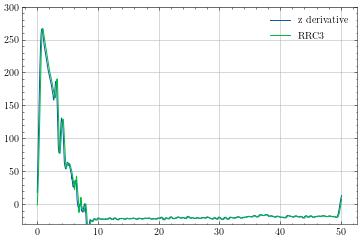

max vel RRC3 normal data =  266.8168683820647 m/s
max vel RRC3 filtered adjusted =  265.98865370020724 m/s
max mach number =  0.7754771244904001


In [183]:
plt.plot(time, vertical_speed, label='z derivative') # Adjusted
plt.plot(time, velocity_RRC3, label='RRC3')
#plt.plot(time, altitude_hat_RRC3)
plt.grid()
plt.ylim(-30, 300)

#print(vertical_speed[2800], vertical_speed[2900], vertical_speed[2700], vertical_speed[2600], vertical_speed[2500], vertical_speed[2750])
plt.legend()
plt.show()
print('max vel RRC3 normal data = ', 266.8168683820647, 'm/s')
print('max vel RRC3 filtered adjusted = ', max(vertical_speed), 'm/s')
print('max mach number = ', max(vertical_speed)/343)

In [66]:
altitude_hat_RRC3[-1]

4.971684361472373

## Comparisons

### Cambridge - RocketPy - OpenRocket
- Altitude
- Vertical Velocity

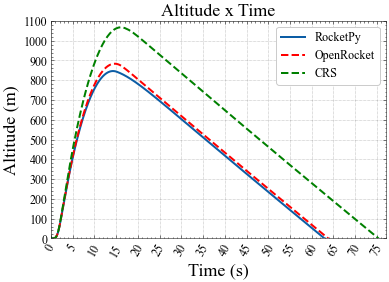

In [78]:
plt.plot(time_rp, altitude_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, altitude_or, 'r--', label='OpenRocket', linewidth=2)
plt.plot(time_cb, altitude_cb, 'g--', label='CRS', linewidth=2)
#plt.plot(time, altitude_hat_RRC3, '-.', color='black', label='RRC3', linewidth=2)
plt.title('Altitude x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Altitude (m)', fontsize=18)

plt.xticks(np.arange(0, 77, 5), rotation=60   , fontsize=12 )
plt.yticks(np.arange(0, 1200, 100), rotation=0, fontsize=12)
plt.xlim(0, 77)
plt.ylim(0, 1100)

# openrocket = 882 meteros
# rocketpy apogee = 846 metros
# real = 860 metros

#plt.tick_params(axis='x',rotation=90)
plt.legend(fontsize=12)  #loc='upper right'  facecolor="yellow"   fontsize=11
#plt.grid()

plt.savefig('Graficos finais v2/altitude_grid_cb_op_rp.pdf')
plt.show()



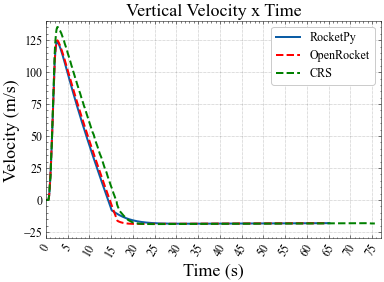

In [79]:
plt.plot(time_rp, velocity_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, velocity_or, 'r--', label='OpenRocket', linewidth=2)
plt.plot(time_cb, velocity_cb, 'g--', label='CRS', linewidth=2)
plt.title('Vertical Velocity x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Velocity (m/s)', fontsize=18)
plt.xticks(np.arange(0, 77, 5), rotation=60, fontsize=12)
plt.yticks(np.arange(-25, 150, 25), fontsize=12)
plt.xlim(0, 77)
plt.ylim(-30, 140)


#plt.grid()
plt.legend(fontsize=12)

#plt.savefig('Graficos finais v2/verticalVel_grid_op_rp_cb.pdf')
plt.show()

### RocketPy vs OpenRocket

- Velocity
- Acceleration
- Angle of attack

In [81]:
# plt.plot(time_rp, total_velocity_rp, label='RocketPy', linewidth=2)
# plt.plot(time_or, total_velocity_or, 'r--', label='OpenRocket', linewidth=2)
# plt.plot(time_cb, totalVelocity_cb,  'g--', label='CRS', linewidth=2)
# plt.title('Total Velocity x Time', fontsize=18)
# plt.xlabel('Time (s)', fontsize=12)
# plt.ylabel('Velocity (m/s)', fontsize=12)
# plt.legend()
# plt.xticks(np.arange(0, 77, 5), rotation=60)
# plt.xlim(0, 77)
# plt.ylim(0, 140)

# plt.grid()
# plt.legend(fontsize=12)

#plt.savefig('Graficos finais v2/totalVel_grid_op_rp_cb.pdf')

#plt.show()

In [82]:
max(velocity_rp)

124.0195682434446

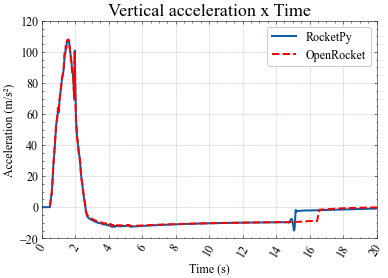

In [84]:
plt.plot(time_rp, acceleration_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, acceleration_or, 'r--', label='OpenRocket', linewidth=2)
plt.title('Vertical acceleration x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Acceleration (m/s²)', fontsize=12)

plt.xticks(np.arange(0, 24, 2), rotation=60, fontsize=12)
plt.yticks(np.arange(-20, 121, 20), fontsize=12)
plt.xlim(0, 20)
plt.ylim(-20, 120)

#plt.grid()
plt.legend(fontsize=12)

plt.savefig('Graficos finais v2/verticalAcceleration_grid_op_rp.pdf')

plt.show()

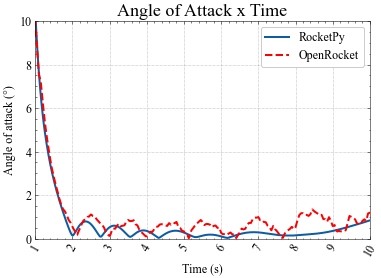

In [85]:
plt.plot(time_rp, angle_attack_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, angle_attack_or, 'r--', label='OpenRocket', linewidth=2)
plt.title('Angle of Attack x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Angle of attack (°)', fontsize=12)

plt.xticks(np.arange(0, 20, 1), rotation=60, fontsize=12)
plt.yticks(np.arange(0, 11, 2), rotation= 0, fontsize=12)
plt.xlim(1, 10)
plt.ylim(0, 10)

#plt.grid()
plt.legend(fontsize=12)

plt.savefig('Graficos finais v2/AngleOfAttack_grid_op_rp.pdf')

plt.show()

### RocketPy vs Cambridge

- Easting x time, Northing x time
- Dispersion

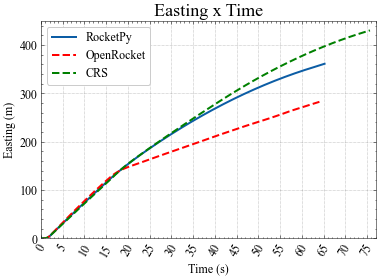

In [101]:
fig1 = plt.figure(figsize=(6, 4))
plt.plot(time_rp, easting_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, easting_or, 'r--', label='OpenRocket', linewidth=2)
plt.plot(time_cb, easting_cb, 'g--', label='CRS', linewidth=2)
plt.title('Easting x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Easting (m)', fontsize=12)

plt.xticks(np.arange(0, 77, 5), rotation=60, fontsize=12)
plt.yticks(np.arange(0, 451, 100), fontsize=12)
plt.xlim(0, 77)
plt.ylim(0, 450)

# plt.grid()
plt.legend(fontsize=12)

plt.savefig('Graficos finais v2/easting_grid_op_rp_cb.pdf')

plt.show()

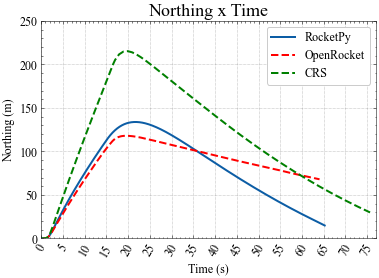

In [103]:
fig1 = plt.figure(figsize=(6, 4))
plt.plot(time_rp, northing_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, northing_or, 'r--', label='OpenRocket', linewidth=2)
plt.plot(time_cb, northing_cb, 'g--', label='CRS', linewidth=2)
plt.title('Northing x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Northing (m)', fontsize=12)

plt.xticks(np.arange(0, 77, 5), rotation=60, fontsize=12)
plt.yticks(np.arange(0, 280, 50), fontsize=12)
plt.xlim(0, 77)
plt.ylim(0, 250)

plt.legend(fontsize=12)
#plt.grid()

plt.savefig('Graficos finais v2/Northing_grid_op_rp.pdf')

plt.show()

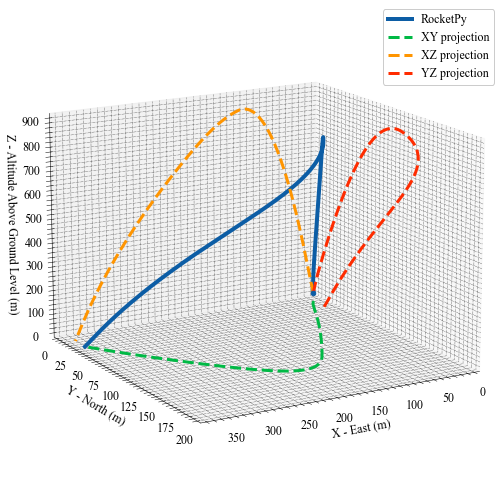

In [118]:
# Get max and min x and y

# maxZ = max(altitude_cb)
# maxX = 360 #max(easting_rp)
# minX = 0 #min(easting_rp)
# maxY = 250 #max(northing_or)
# minY = 0 #min(northing_rp)
# maxXY = max(maxX, maxY)
# minXY = min(minX, minY)

# Create figure
fig1 = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111, projection="3d")
ax1.plot(easting_rp, northing_rp, altitude_rp, linewidth='4', label='RocketPy')
ax1.plot(easting_rp, northing_rp, zs= min(altitude_rp), zdir="z", linestyle="--", linewidth='3', label='XY projection')
ax1.plot(easting_rp, altitude_rp, zs=min(northing_rp), zdir="y", linestyle="--", linewidth='3', label='XZ projection')
ax1.plot(northing_rp, altitude_rp, zs= min(easting_rp), zdir="x", linestyle="--", linewidth='3', label='YZ projection')
ax1.scatter(0, 0, 0)
ax1.set_xlabel("X - East (m)", fontsize=12)
ax1.set_ylabel("Y - North (m)", fontsize=12)
ax1.set_zlabel("Z - Altitude Above Ground Level (m)", fontsize=12)
#ax1.set_title("Flight Trajectory")
#ax1.set_zlim3d([0, maxZ])
#ax1.set_ylim3d([minXY, maxXY])
#ax1.set_xlim3d([minXY, maxXY])
#ax1.view_init(15, 45)

#ax2 = plt.subplot(111, projection="3d")
#ax1.plot(easting_or, northing_or, zs= 0, zdir="z", linestyle="--", color='green')
#ax1.plot(easting_or, altitude_or, zs=minXY, zdir="y", linestyle="--", color='green')
#ax1.plot(northing_or, altitude_or, zs=minXY, zdir="x", linestyle="--", color='green')

#ax1.plot(easting_or, northing_or, altitude_or, 'g--', linewidth='2', label='OpenRocket')
#ax1.plot(easting_cb, northing_cb, altitude_cb, 'r--', linewidth='2', label='Cambridge Rocketry Simulator')

#ax1.scatter(0, 0, 0)
#ax1.scatter(0, 0, 0)
#ax1.set_xlabel("X - East (m)")
#ax1.set_ylabel("Y - North (m)")
#ax1.set_zlabel("Z - Altitude Above Ground Level (m)")
#ax1.set_title("Flight Trajectory")
ax1.set_zlim3d([0, 900])
ax1.set_ylim3d([0, 200])
ax1.set_xlim3d([0, 380])
ax1.view_init(15, 60)

#plt.xticks(np.arange(0, 380, 100))
#plt.yticks(np.arange(0, 200, 100))
#ax1.zticks(np.arange(0, 900, 100))
#ax1.tick_params(x=100, y= 100, z= 100)
ax1.set_zticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_zticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.legend(fontsize='12')
#ax1.grid(linewidth=0)S
#plt.savefig('Graficos finais v2/Trajectory_rp.pdf')
#plt.grid()

plt.show()

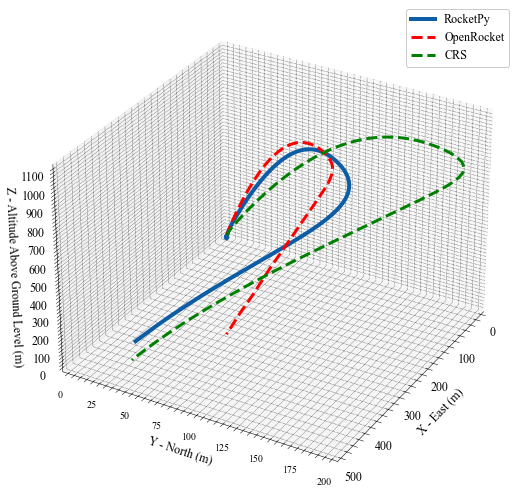

In [128]:
# Get max and min x and y

# maxZ = max(altitude_cb)
# maxX = 360 #max(easting_rp)
# minX = 0 #min(easting_rp)
# maxY = 250 #max(northing_or)
# minY = 0 #min(northing_rp)
# maxXY = max(maxX, maxY)
# minXY = min(minX, minY)

# Create figure
fig1 = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111, projection="3d")
#ax1.plot(easting_rp, northing_rp, zs= 0, zdir="z", linestyle="--", linewidth='2')
#ax1.plot(easting_rp, altitude_rp, zs=0, zdir="y", linestyle="--", linewidth='2')
#ax1.plot(northing_rp, altitude_rp, zs=0, zdir="x", linestyle="--", linewidth='2')
ax1.plot(easting_rp, northing_rp, altitude_rp, linewidth='4', label='RocketPy')
ax1.scatter(0, 0, 0)
ax1.set_xlabel("X - East (m)", fontsize=12)
ax1.set_ylabel("Y - North (m)", fontsize=12)
ax1.set_zlabel("Z - Altitude Above Ground Level (m)", fontsize=12)
#ax1.set_title("Flight Trajectory")
#ax1.set_zlim3d([0, maxZ])
#ax1.set_ylim3d([minXY, maxXY])
#ax1.set_xlim3d([minXY, maxXY])
#ax1.view_init(15, 45)

#ax2 = plt.subplot(111, projection="3d")
#ax1.plot(easting_or, northing_or, zs= 0, zdir="z", linestyle="--", color='red')
#ax1.plot(easting_or, altitude_or, zs=minXY, zdir="y", linestyle="--", color='red')
#ax1.plot(northing_or, altitude_or, zs=minXY, zdir="x", linestyle="--", color='red')

ax1.plot(easting_or, northing_or, altitude_or, 'r--', linewidth='3', label='OpenRocket')
ax1.plot(easting_cb, northing_cb, altitude_cb, 'g--', linewidth='3', label='CRS')

#ax1.scatter(0, 0, 0)
#ax1.scatter(0, 0, 0)
#ax1.set_xlabel("X - East (m)")
#ax1.set_ylabel("Y - North (m)")
#ax1.set_zlabel("Z - Altitude Above Ground Level (m)")
#ax1.set_title("Flight Trajectory")
ax1.set_zlim3d([0, 1100])
ax1.set_ylim3d([0, 200])
ax1.set_xlim3d([0, 500])
ax1.view_init(30, 30)

#plt.xticks(np.arange(0, 380, 100))
#plt.yticks(np.arange(0, 200, 100))
#ax1.zticks(np.arange(0, 900, 100))
#ax1.tick_params(x=100, y= 100, z= 100)
ax1.set_zticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100])
plt.legend(fontsize=12)
#ax1.grid(linewidth=0)
plt.savefig('Graficos finais v2/Trajectory_rp_cp_op.pdf')

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_zticklabels(), fontsize=12)
#plt.setp(ax1.get_yticklabels(), fontsize=12)

plt.show()

### Rocketpy Disp

In [129]:
import glob
filename = 'Valetudo_rocketpy_CFD/Valetudo_rocketpy_CFD/valetudo_reanalysis'

# Initialize variable to store all results
dispersion_general_results = []

dispersion_results = {"outOfRailTime": [],
                  "outOfRailVelocity": [],
                         "apogeeTime": [],
                     "apogeeAltitude": [],
                            "apogeeX": [],
                            "apogeeY": [],
                         "impactTime": [],
                            "impactX": [],
                            "impactY": [],
                     "impactVelocity": [],
                "initialStaticMargin": [],
              "outOfRailStaticMargin": [],
                  "finalStaticMargin": [],
                     "numberOfEvents": [],
                        "maxVelocity": [],
                  "drogueTriggerTime": [],
                 "drogueInflatedTime": [],
             "drogueInflatedVelocity": []}

# Get all dispersion results
for filename in glob.iglob(str(filename)+'.valetudo_disp_out.txt'):
    # Get file
    dispersion_output_file = open(filename, 'r+')
    
    # Read each line of the file and convert to dict
    for line in dispersion_output_file:
        if line[0] == '{':
            flight_result = eval(line)

            # Store general result
            # if flight_result['apogeeAltitude']  > 650:
            dispersion_general_results.append(flight_result)
            # Store result by type
            for parameter_key, parameter_value in flight_result.items():
                dispersion_results[parameter_key].append(parameter_value)

# Close data file
dispersion_output_file.close()

# Creating end of file
# dispersion_output_file.write ("Name Mean Value | Standard Deviation" + '\n')

# Print number of flights simulated
N = len(dispersion_general_results)
print('Number of simulations: ', N)

Number of simulations:  19300


Apogee Altitude - Mean Value: 846.224
Apogee Altitude - Standard Deviation: 42.574
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


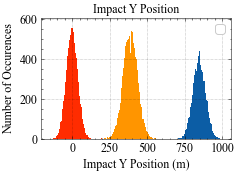

In [148]:
print('Apogee Altitude - Mean Value: {:.3f}'.format(np.mean(dispersion_results["apogeeAltitude"])))
print('Apogee Altitude - Standard Deviation: {:.3f}'.format(np.std(dispersion_results["apogeeAltitude"])))
# dispersion_output_file.write ("apogeeAltitude: " + str(np.mean(dispersion_results["apogeeAltitude"])) +' | '+str(np.std(dispersion_results["apogeeAltitude"])) + "\n")
# plt.figure(figsize=(6,4))
# plt.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5),  range=(700,1000)) #align='mid',
# plt.title('Apogee Altitude', fontsize=18)
# plt.xlabel('Altitude (m)', fontsize=12)
# plt.ylabel('Number of Occurences', fontsize=12)

#plt.savefig('Graficos finais v2/disp_apogee_rp.pdf')

#plt.show()

# Real measured apogee = 860 m

#fig, (ax1, ax4) =

fig = plt.figure(222) #plt.subplot(221)#plt.subplots(ncols=2, nrows=2, figsize=(10, 4)))

#fig.suptitle("Comparison: Flight vs Simulation", fontsize=24)
ax1 = fig.add_subplot()
ax1.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5),  range=(700,1000))
ax1.set_title('Apogee Altitude', fontsize=18)
ax1.set_xlabel('Altitude (m)', fontsize=12)
ax1.set_ylabel('Number of Occurences', fontsize=12)

ax2 = fig.add_subplot()
ax2.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
ax2.set_title('Apogee Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Number of Occurences', fontsize=12)

ax3 = fig.add_subplot()
ax3.hist(dispersion_results["impactX"], bins=int(N**0.5))
ax3.set_title('Impact X Position')
ax3.set_xlabel('Impact X Position (m)')
ax3.set_ylabel('Number of Occurences', fontsize=12)

ax4 = fig.add_subplot()
ax4.hist(dispersion_results["impactY"], bins=int(N**0.5))
ax4.set_title('Impact Y Position')
ax4.set_xlabel('Impact Y Position (m)')
ax4.set_ylabel('Number of Occurences', fontsize=12)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)

plt.tight_layout()

plt.show()


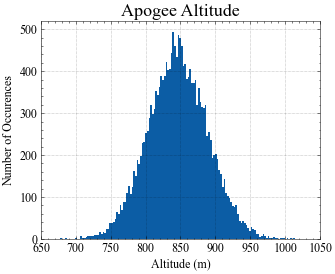

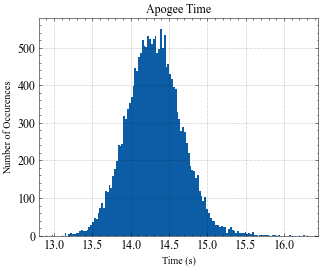

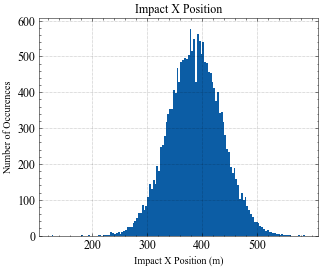

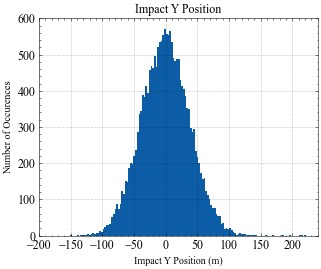

In [167]:
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5))
plt.title('Apogee Altitude', fontsize=18)
plt.xlabel('Altitude (m)', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(np.arange(650, 1100, 50), fontsize=12)
plt.yticks(np.arange(0, 550, 100), fontsize=12)

plt.savefig('Graficos finais v2/apogee_valeMC.pdf')
#plt.show()
##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
plt.title('Apogee Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(13, 16.1, 0.5), fontsize=12)
plt.yticks(np.arange(0, 550, 100), fontsize=12)
plt.savefig('Graficos finais v2/apogeeTIME_valeMC.pdf')
plt.show()

##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["impactX"], bins=int(N**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(200, 600, 100), fontsize=12)
plt.yticks(np.arange(0, 650, 100), fontsize=12)

plt.savefig('Graficos finais v2/ImpactX_valeMC.pdf')
plt.show()

##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["impactY"], bins=int(N**0.5))
plt.title('Impact Y Position')
plt.xlabel('Impact Y Position (m)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(-200, 201, 50), fontsize=12)
plt.yticks(np.arange(0, 650, 100), fontsize=12)
plt.savefig('Graficos finais v2/ImpactY_valeMC.pdf')
plt.show()



Impact X Position - Mean Value:  387.41544148404876
Impact X Position - Standard Deviation:  48.22567804394269


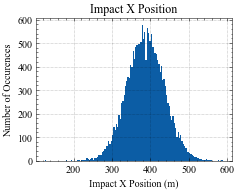

In [131]:
print('Impact X Position - Mean Value: ', np.mean(dispersion_results["impactX"]))
print('Impact X Position - Standard Deviation: ', np.std(dispersion_results["impactX"]))
# dispersion_output_file.write ("impactX: " + str(np.mean(dispersion_results["impactX"])) +' | '+str(np.std(dispersion_results["impactX"])) + "\n")
plt.figure()
plt.hist(dispersion_results["impactX"], bins=int(N**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')


plt.show()

Apogee Time - Mean Value:  14.310798894057365
Apogee Time - Standard Deviation:  0.3546958639105797


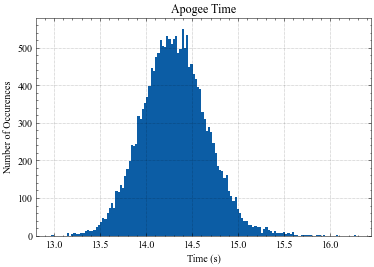

In [61]:
print('Apogee Time - Mean Value: ', np.mean(dispersion_results["apogeeTime"]))
print('Apogee Time - Standard Deviation: ', np.std(dispersion_results["apogeeTime"]))
# dispersion_output_file.write ("apogeeTime: " + str(np.mean(dispersion_results["apogeeTime"])) +' | '+str(np.std(dispersion_results["apogeeTime"])) + "\n")
plt.figure()
plt.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
plt.title('Apogee Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Occurences')
plt.show()

Impact Y Position - Mean Value:  -0.21956565235608472
Impact Y Position - Standard Deviation:  38.15197587463702


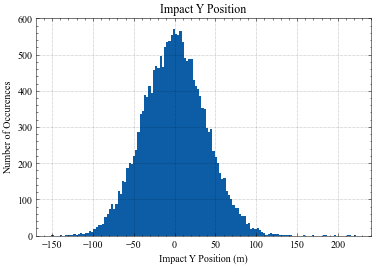

In [62]:
print('Impact Y Position - Mean Value: ', np.mean(dispersion_results["impactY"]))
print('Impact Y Position - Standard Deviation: ', np.std(dispersion_results["impactY"]))
# dispersion_output_file.write ("impactY: " + str(np.mean(dispersion_results["impactY"])) +' | '+str(np.std(dispersion_results["impactY"])) + "\n")
plt.figure()
plt.hist(dispersion_results["impactY"], bins=int(N**0.5))
plt.title('Impact Y Position')
plt.xlabel('Impact Y Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

### Cambridge Disp

In [64]:
index_cb = df_cb['INDEX']
time_cb = df_cb['TIME_SECONDS_DOUBLE']
altitude_cb = df_cb['ALTITUDE_METERS_DOUBLE']
easting_cb = df_cb['EASTINGS_METERS_DOUBLE']
northing_cb = df_cb['NORTHINGS_METERS_DOUBLE']

In [65]:
impactX_cb = []
impactY_cb = []
for i in range(1, len(index_cb), 1):
  if index_cb[i]==0 and index_cb[i-1]!=0:
    impactX_cb.append(easting_cb[i-1])
    impactY_cb.append(northing_cb[i-1])

print(len(impactX_cb), len(impactY_cb))

2999 2999


Impact X Position - Mean Value:  425.96162910970327
Impact X Position - Standard Deviation:  90.76871994134962


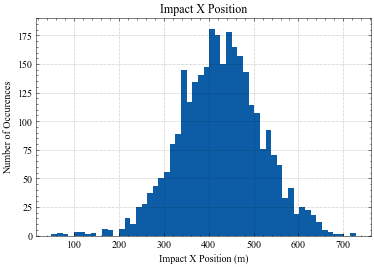

In [66]:
print('Impact X Position - Mean Value: ', np.mean(impactX_cb))
print('Impact X Position - Standard Deviation: ', np.std(impactX_cb))
plt.figure()
plt.hist(impactX_cb, bins=int(2999**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

Impact X Position - Mean Value:  11.710644948316105
Impact X Position - Standard Deviation:  96.26873638225024


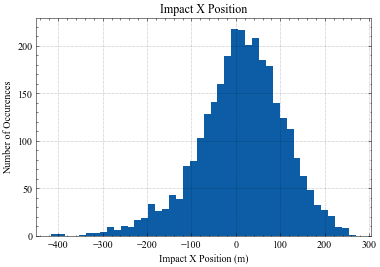

In [67]:
print('Impact X Position - Mean Value: ', np.mean(impactY_cb))
print('Impact X Position - Standard Deviation: ', np.std(impactY_cb))
plt.figure()
plt.hist(impactY_cb, bins=int(1999**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

### Ellipses

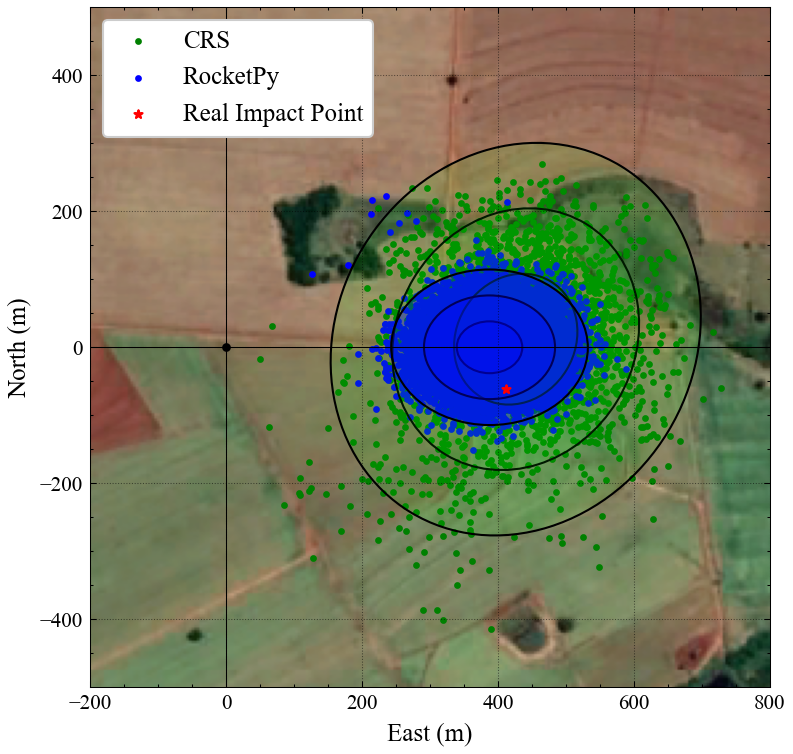

In [187]:
# Import libraries
from imageio import imread
from matplotlib.patches import Ellipse

# Import background map
img = imread("Valetudo_rocketpy_CFD/Valetudo_rocketpy_CFD/Valetudo_basemap_final.png")

# Retrieve dispersion data por apogee and impact XY position
#apogeeX = np.array(dispersion_results['apogeeX'])
#apogeeY = np.array(dispersion_results['apogeeY'])
impactX = np.array(dispersion_results['impactX'])
impactY = np.array(dispersion_results['impactY'])
impactX_cb = np.array(impactX_cb)
impactY_cb = np.array(impactY_cb)

# Define function to calculate eigen values
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  
# Create plot figure
plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(111)


# Draw cambridge impact points (cambridge)
plt.scatter(impactX_cb, impactY_cb, s=5, label="CRS", color='green')

# Calculate error ellipses for impact (CAMBRIDGE)
apogeeCov = np.cov(impactX_cb, impactY_cb)
apogeeVals, apogeeVecs = eigsorted(apogeeCov)
apogeeTheta = np.degrees(np.arctan2(*apogeeVecs[:,0][::-1]))
apogeeW, apogeeH = 2 * np.sqrt(apogeeVals)

# Draw error ellipses for impact (CAMBRIDGE)
for j in [1, 2, 3]:
    apogeeEll = Ellipse(xy=(np.mean(impactX_cb), np.mean(impactY_cb)),
                  width=apogeeW*j, height=apogeeH*j,
                  angle=apogeeTheta, color='black')
    apogeeEll.set_facecolor((0, 1, 0, 0.1))
    ax.add_artist(apogeeEll)

# Calculate error ellipses for impact (ROCKETPY)
impactCov = np.cov(impactX, impactY)
impactVals, impactVecs = eigsorted(impactCov)
impactTheta = np.degrees(np.arctan2(*impactVecs[:,0][::-1]))
impactW, impactH = 2 * np.sqrt(impactVals)

# Draw error ellipses for impact (ROCKETPY)
impact_ellipses = []
for j in [1, 2, 3]:
    impactEll = Ellipse(xy=(np.mean(impactX), np.mean(impactY)),
                  width=impactW*j, height=impactH*j,
                  angle=impactTheta, color='black')
    impactEll.set_facecolor((0, 0, 1, 0.35))
    impact_ellipses.append(impactEll)
    ax.add_artist(impactEll)



# Add title and labels to plot
#ax.set_title('$1\sigma$, $2\sigma$ and $3\sigma$ ellipses of the Impact Point')
ax.set_ylabel('North (m)', fontsize=12)
ax.set_xlabel('East (m)', fontsize=12)

# Add background image to plot
dx = 0
dy = 0
plt.imshow(img,zorder=0, extent=[-1000-dx, 1000-dx, -1000-dy, 1000-dy])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlim(-200, 800)
plt.ylim(-500, 500)

# Draw impact points (RocketPy)
plt.scatter(impactX, impactY, s=5, label="RocketPy", color='blue')

# Draw launch point
plt.scatter(0, 0, s=10, color='black')

# Add real landing point
plt.scatter( 411.89, -61.07, s=17, color='red', marker='*', label="Real Impact Point", zorder=1000)

# Calculate probability of rocket being out of 3-sigma error ellipse for impact
#cos_angle = np.cos(np.radians(180.-impactTheta))
#sin_angle = np.sin(np.radians(180.-impactTheta))
#
#xc = impactX - np.mean(impactX)
#yc = impactY - np.mean(impactY)
#
#xct = xc * cos_angle - yc * sin_angle
#yct = xc * sin_angle + yc * cos_angle 
#
#n=3
#rad_cc = (xct**2/(n*impactW/2.)**2) + (yct**2/(n*impactH/2.)**2)
#
#colors_array = []
#count = 0
#
#for r in rad_cc:
#    if r <= 1.:
#        # point in ellipse
#        colors_array.append('red')
#        count+=1
#    else:
#        # point not in ellipse
#        colors_array.append('blue')
#        
#print("Probability of Impact out of Error Ellipses: " + "{:.3f}".format(100 - 100*count/len(impactX)) + " %")
plt.legend(fontsize=12, loc=2)#facecolor='white')
#plt.grid()
plt.savefig('Graficos finais v2/Final_Ellipses.pdf')
plt.show()

Ballistic Trajectoruy plot

## Save this notebook as .html

In [ ]:
!jupyter nbconvert --output-dir="/gdrive/Shared drives/RocketPy Paper/Conteudo/flightData" --to html "/gdrive/Shared drives/RocketPy Paper/Conteudo/flightData/rocketpaper.ipynb" --output "rocketpaper_report_final.html"

[NbConvertApp] Converting notebook /gdrive/Shared drives/RocketPy Paper/Conteudo/flightData/rocketpaper.ipynb to html
[NbConvertApp] Writing 1554150 bytes to /gdrive/Shared drives/RocketPy Paper/Conteudo/flightData/rocketpaper_report_final.html
